Step : 0, Train Accuracy : 0.7900508582326764, Test Accuracy: 0.8006613131790269
Train Loss : 0.5898086428642273, Test Loss: 0.4420067071914673
Step : 50, Train Accuracy : 0.8775429116338207, Test Accuracy: 0.8814359943316014
Train Loss : 0.42111438512802124, Test Loss: 0.28445711731910706
Step : 100, Train Accuracy : 0.9047202797202797, Test Accuracy: 0.9097779877184695
Train Loss : 0.3671323359012604, Test Loss: 0.23252947628498077
Step : 150, Train Accuracy : 0.9218849332485696, Test Accuracy: 0.9220595181861124
Train Loss : 0.3349335193634033, Test Loss: 0.2007758468389511
Step : 200, Train Accuracy : 0.9335664335664335, Test Accuracy: 0.9305621162021729
Train Loss : 0.31192344427108765, Test Loss: 0.17772868275642395
Step : 250, Train Accuracy : 0.9401621106166561, Test Accuracy: 0.9395370807746811
Train Loss : 0.29434990882873535, Test Loss: 0.15995506942272186
Step : 300, Train Accuracy : 0.9452479338842975, Test Accuracy: 0.947094945677846
Train Loss : 0.28041183948516846, Test

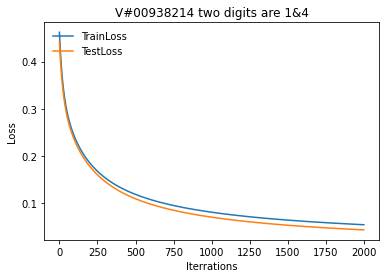

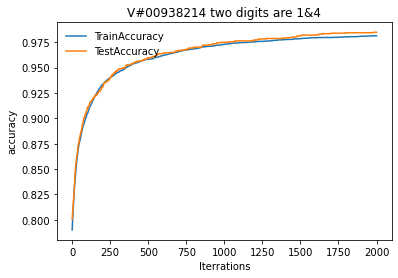

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pt

from tensorflow.keras.datasets import mnist

testLoss = list()
trainLoss =list()
testAcc =list()
trainAcc =list()
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

#784 features (28*28).
no_features = 784 
no_classes = 1 

#converting in two-class problem: V# V00938214

trn_filtr_class= np.where((y_train==1) | (y_train==4))
x_train, y_train = x_train[trn_filtr_class], y_train[trn_filtr_class]
y_train=np.where(y_train==1,1,-1)


tst_filtr_class= np.where((y_test==1) | (y_test==4))
x_test, y_test = x_test[tst_filtr_class], y_test[tst_filtr_class]
y_test=np.where(y_test==1,1,-1)

y_train=y_train.astype(dtype=np.float32)
y_test=y_test.astype(dtype=np.float32)

x_train, x_test = x_train.reshape([-1, no_features]).astype(dtype=np.float32)/255.0, x_test.reshape([-1, no_features]).astype(dtype=np.float32)/255.0

y_train = tf.reshape(y_train, (y_train.shape[0],no_classes))
y_test= tf.reshape(y_test, (y_test.shape[0],no_classes))

# MNIST parameters.
learn_rate = 0.01
train_steps = 2001
display = 50

W = tf.Variable(tf.random.uniform([no_features, no_classes],minval=-1.0, maxval=1.0), name="weight")
b = tf.Variable(tf.zeros([no_classes]), name="bias")



def log_reg(x):
    return tf.matmul(x, W) + b

# Logistic loss function
def logistic_Loss(y_pred, y_true):
    logistic_loss = tf.math.log(1+tf.math.exp(-y_true*y_pred))
    return tf.reduce_mean(logistic_loss)

def l2_regularize_fn(loss):
  regularize = tf.nn.l2_loss([W])
  loss+=0.001*regularize;
  return loss

def accuracy(y_pred, y_true):
  positives = np.where(((y_true==1) & (y_pred>=0))) 
  negatives= np.where(((y_true== -1) & (y_pred<0))) 
  #print(f"{positives}")
  correct_predictions = positives[0].shape[0]+negatives[0].shape[0]
  
  return correct_predictions/y_pred.shape[0]

optimizer = tf.optimizers.SGD(learn_rate)

def run_optim(x, y):

    with tf.GradientTape() as g:

        pred = log_reg(x)
        loss = logistic_Loss(pred, y)
        trainLoss.append(loss)
        loss=l2_regularize_fn(loss)
  
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return pred,loss

for step in range(train_steps):
    pred,loss = run_optim(x_train, y_train)
    acc = accuracy(pred, y_train)
    trainAcc.append(acc)
    test_pred = log_reg(x_test)
    test_loss=logistic_Loss(test_pred,y_test)
    test_acc=accuracy(test_pred, y_test)
    testLoss.append(test_loss)
    testAcc.append(test_acc)
    #test acc to list
    if step % display == 0:
        print(f"Step : {step}, Train Accuracy : {acc}, Test Accuracy: {test_acc}")
        print(f"Train Loss : {loss}, Test Loss: {test_loss}")
        

        
# Plotting Graphs for loss

itr =[x for x in range(train_steps)]
pt.plot(itr,trainLoss,label='TrainLoss')
pt.plot(itr,testLoss,label='TestLoss')
pt.xlabel("Iterrations")
pt.ylabel("Loss")
pt.legend(loc='upper left', frameon=False)
pt.title("V#00938214 two digits are 1&4")
plt.pyplot.show()


# Plotting Graphs for accuracy

pt.plot(itr,trainAcc,label='TrainAccuracy')
pt.plot(itr,testAcc,label='TestAccuracy')
pt.xlabel("Iterrations")
pt.ylabel("accuracy")
pt.title("V#00938214 two digits are 1&4")

pt.legend(loc='upper left', frameon=False)
plt.pyplot.show()

